# 4.9 Intro to Data Visualization with Python


## Content List
> * Import Libraries and Data
> * Create bar chart of order day of week
> * Histogram of prices
> * Scatterplot of prices
> * Create Random seed sample
> * Line chart of order day of week and prices
> * Histogram of Order hour of Day
> * Bar chart with loyalty Flag
> * Line Chart of prices and order hour of day
> * Line Graph of age and number of dependants
> * Scatterplot of Age and income
> * Export Visualizations

## Import libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [51]:
#folder path
path = r'C:\Users\kaydo\OneDrive\Desktop\Python'

In [3]:
# import orders_products_merged_aggregated.pkl
ords_prods_all = pd.read_pickle(r'C:\Users\kaydo\OneDrive\Desktop\Python\Data\Prepared Data\orders_products_merged_aggregated.pkl')

In [29]:
#import instacart_data.pkl
instacart_data= pd.read_pickle(r'C:\Users\kaydo\OneDrive\Desktop\Python\Data\Prepared Data\instacart_data.pkl')

In [30]:
instacart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int64   
 4   Order_day_of_week       int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  Busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [31]:
#check shape
instacart_data.shape

(32404859, 32)

## Create bar chart of order day of week

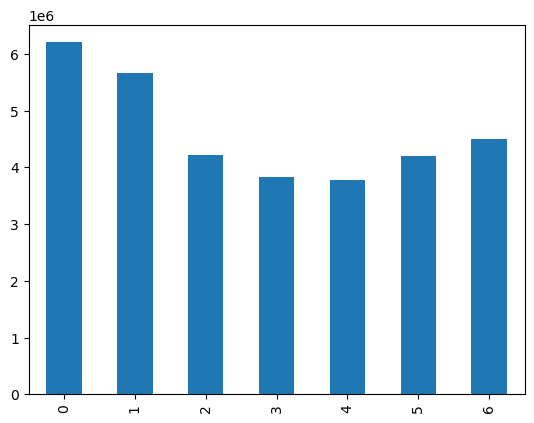

In [52]:
#Create a bar chart
bar = instacart_data['Order_day_of_week'].value_counts().sort_index().plot.bar()

## Histogram of prices

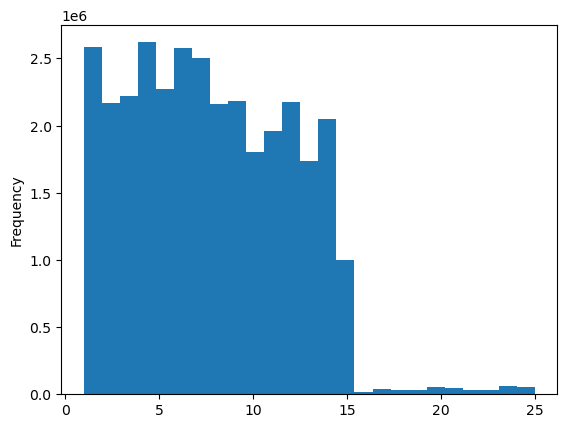

In [53]:
# Create a histogram 
hist = instacart_data['prices'].plot.hist(bins = 25)

## Scatterplot of prices

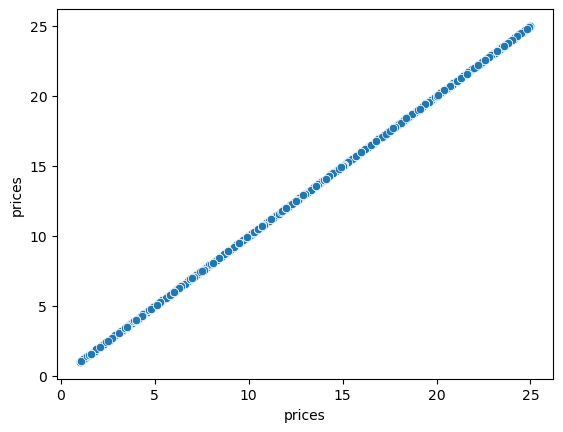

In [54]:
#Create a scatterplot
scat =sns.scatterplot(x = 'prices', y = 'prices',data = instacart_data)

## Create Random seed sample

In [35]:
#create random seed
np.random.seed(4)
dev = np.random.rand(len(instacart_data)) <= 0.7

In [36]:
#Store 70% of the sample into the dataframe big
big= instacart_data[dev]

In [37]:
#store 30% of the sample in the dataframe small
small = instacart_data[~dev]

In [38]:
#check output
len(instacart_data)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
#Create a subset for line chart
df_2 = small[['Order_day_of_week','prices']]

## Line chart of order day of week and prices

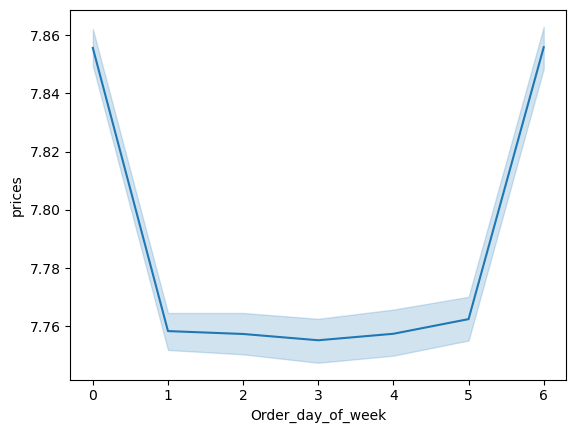

In [19]:
#create line chart
line = sns.lineplot(data = df_2, x = 'Order_day_of_week',y = 'prices')

## Histogram of Order hour of Day

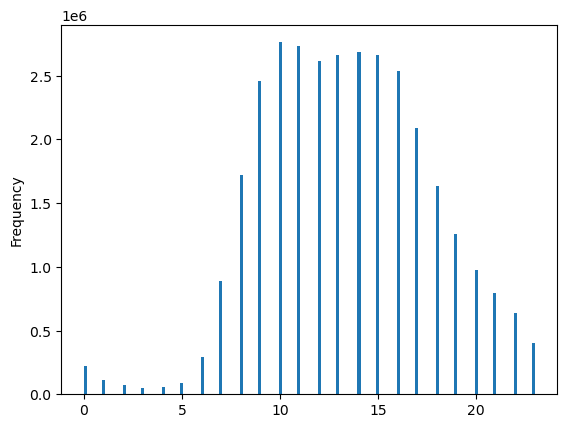

In [55]:
#Create a histogram of the 'order_hour_of_day' column
order_hour_hist =instacart_data['order_hour_of_day'].plot.hist(bins = 150)


The histogram shows the frequency values of orders per hour based on the entire dataset. This visual quikcly highlights that the busiest hours of the day are about the middle of the day 9 am- 4 pm.

## Bar chart with loyalty Flag

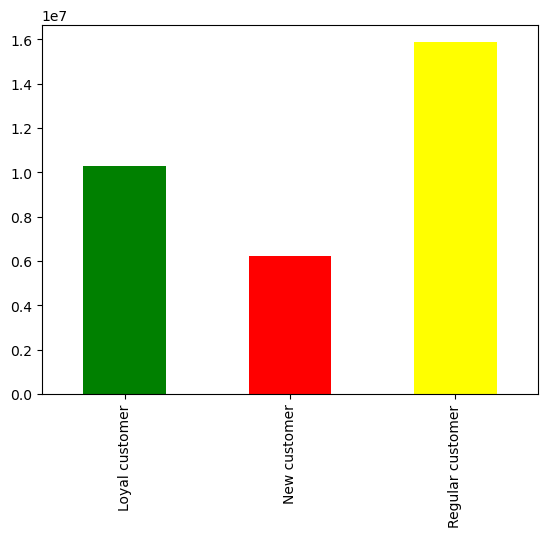

In [56]:
#Create a bar chart from the 'loyalty_flag' column
bar_chart =instacart_data['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['green', 'red', 'yellow'])

## Line Chart of prices and order hour of day

In [23]:
#Create a subset of prices to make line chart
df_order_hour_day_prices = small[['order_hour_of_day', 'prices']]

In [24]:
df_order_hour_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,9,9.0


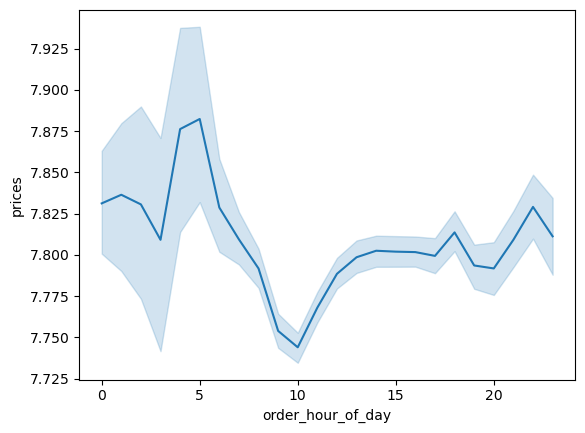

In [57]:
#create line chart based on hour and prices
line_hour_prices = sns.lineplot(data= df_order_hour_day_prices, x = 'order_hour_of_day', y = 'prices')

## Line Graph of age and number of dependants

In [48]:
#Create a subset for line chart that compares age and family 
df_age_dependants = small[['age','number_dependants']]

In [47]:
df_age_dependants.head()

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


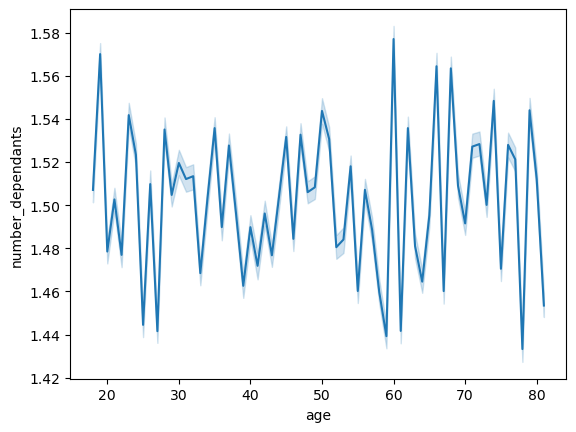

In [68]:
#Create line graph based on subset 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'number_dependants')

After reviewing the line chart based on age and number of dependants, I would see no correlation as the graph is very sparratic and all over the place. 


## Scatterplot of Age and income

In [49]:
#Create a subset of age and income
df_age_income = small [['age','income']]

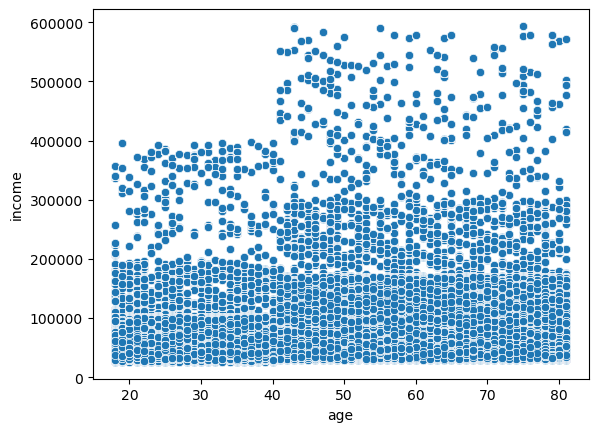

In [50]:
#create scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

Based on the scatterplot above we can deduce that age and income do have a positive correlation. Lower income values are seen more with people under the age of 40. While after forty, income increases significantly. 

## Export Visualizations as png files

In [61]:
#Export bar chart
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

In [60]:
# export histogram based on prices
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_histogram.png'))

In [62]:
#export scatterplot
scat.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'price_scatterplot.png'))

In [63]:
#export line graph
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dow_prices_linegraph.png'))

In [64]:
#export histogram 
order_hour_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'order_hour_histogram.png'))

In [65]:
#export bar chart
bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_bar_chart.png'))

In [66]:
#export line graph
line_hour_prices.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hour_prices_line_graph.png'))

In [69]:
#export line chart
line_chart_age_dependants.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_dependants_line_chart.png'))

In [70]:
#export scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income_scatterplot.png'))